In [134]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [135]:
df = pd.read_csv('medical_examination.csv')
df['overweight'] = df['weight'] / ((df['height']/100) ** 2)
df['overweight'] = (df['overweight'] >= 25).astype(int)
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [136]:
df = df[df['ap_lo'] <= df['ap_hi']]
df.shape

(68766, 14)

In [137]:
# (df['height'] >= df['height'].quantile(0.025)) & (df['height'] <= df['height'].quantile(0.975))
# df_drop_bp['height'].quantile(0.025)
# df_drop_bp['height'].quantile(0.975)
df = df[(df['height'] >= df['height'].quantile(0.025))]
df = df[(df['height'] <= df['height'].quantile(0.975))]
df.shape

(65859, 14)

In [138]:
df= df[(df['weight'] >= df['weight'].quantile(0.025))]
df =df[(df['weight'] <= df['weight'].quantile(0.975))]
df.head()


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [139]:
df.loc[df['cholesterol'] == 1, 'cholesterol'] = 0
df.loc[df['cholesterol'] > 1, 'cholesterol'] = 1

In [140]:
df.loc[df['gluc'] == 1, 'gluc'] = 0
df.loc[df['gluc'] > 1, 'gluc'] = 1

In [141]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0


In [142]:
melted_df = pd.melt(df, id_vars=['cardio'], value_vars=['active', 'alco', 'cholesterol', 'gluc', 'overweight', 'smoke'], var_name='variable', value_name='total')
melted_df.head()

,cardio,variable,total
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


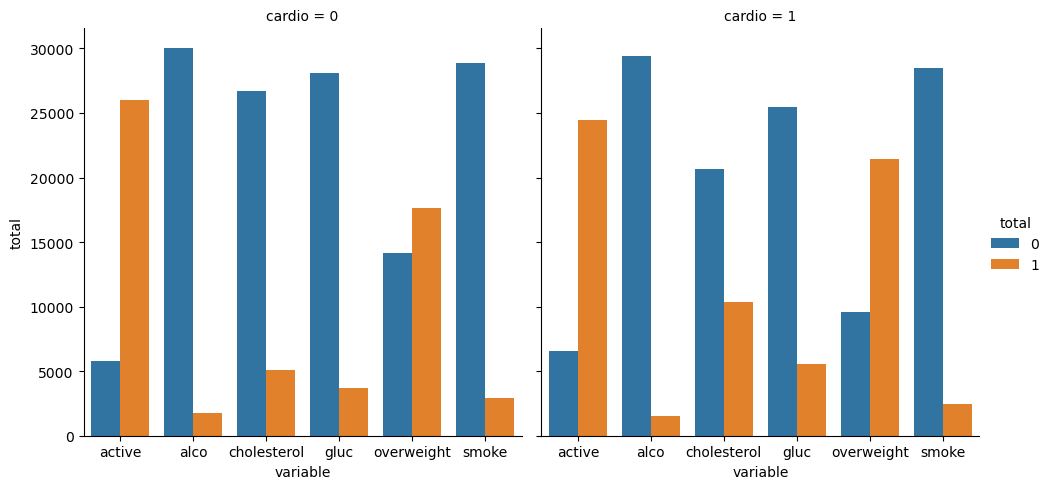

'total'

In [143]:
# Create the chart
fig = sns.catplot(data=melted_df, kind='count', x='variable', hue='total', col='cardio', col_wrap=2)
fig.set_axis_labels("variable", "total")
# Show the chart
plt.show()
ax = fig.axes[0]
ax
ax.get_ylabel()

In [144]:
df_heat = df.corr()
mask = np.triu(np.ones_like(df_heat, dtype=bool))
masked_corr_matrix = df_heat.mask(mask)
masked_corr_matrix.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,0.002623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,0.003799,-0.018274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
height,0.000221,-0.077426,0.504722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,0.000144,0.069705,0.130116,0.248868,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


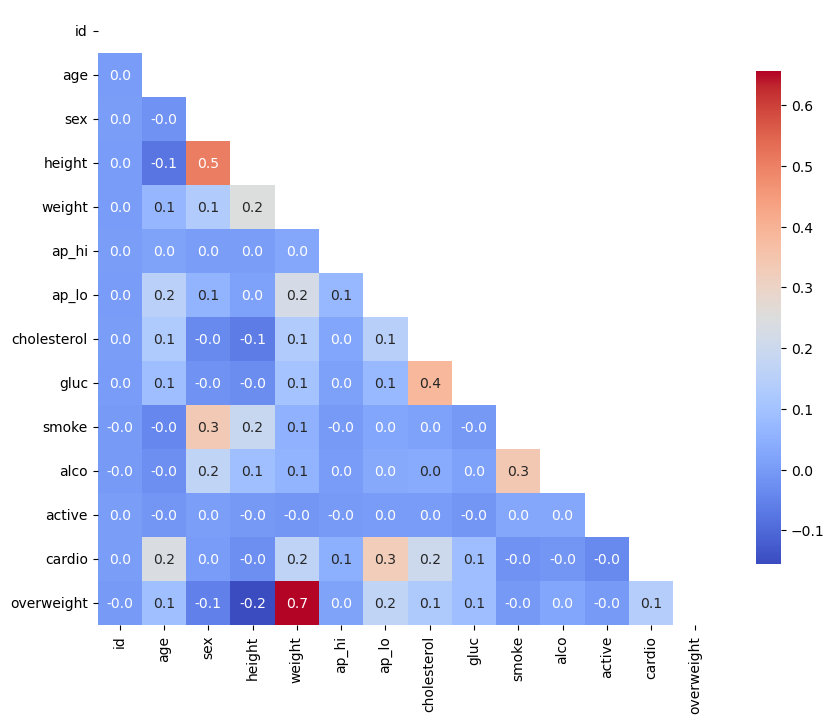

In [145]:
fig, ax = plt.subplots(figsize=(10, 8))

# Draw the heatmap with 'sns.heatmap()'
heatmap = sns.heatmap(data=masked_corr_matrix, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={"shrink": 0.8}, ax=ax)
# fig.get_text()
heatmap_t = fig.axes[0]
heatmap
mt_lst = []
for i in heatmap.get_xticklabels():
    mt_lst.append(i.get_text())
mt_lst
mt_lst2 = []
for i in heatmap_t.get_default_bbox_extra_artists():
    if isinstance(i, mpl.text.Text):
        mt_lst2.append(i.get_text())
mt_lst2
plt.show()


In [146]:
expected = ['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.3', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.2', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.1', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
len(expected)

91

In [148]:
mine = pd.Series(mt_lst2)
camp = pd.Series(expected)

comparison = mine == camp
comparison.value_counts()
# data_comp = pd.DataFrame({'Self':mine,'camp':camp,'Comp':comparison})
# data_comp.to_csv('comp.csv', index=True)
print(mt_lst2)

['0.0', '0.0', '-0.0', '0.0', '-0.1', '0.5', '0.0', '0.1', '0.1', '0.2', '0.0', '0.0', '0.0', '0.0', '0.0', '0.0', '0.2', '0.1', '0.0', '0.2', '0.1', '0.0', '0.1', '-0.0', '-0.1', '0.1', '0.0', '0.1', '0.0', '0.1', '-0.0', '-0.0', '0.1', '0.0', '0.1', '0.4', '-0.0', '-0.0', '0.3', '0.2', '0.1', '-0.0', '0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.2', '0.1', '0.1', '0.0', '0.0', '0.0', '0.0', '0.3', '0.0', '-0.0', '0.0', '-0.0', '-0.0', '-0.0', '0.0', '0.0', '-0.0', '0.0', '0.0', '0.0', '0.2', '0.0', '-0.0', '0.2', '0.1', '0.3', '0.2', '0.1', '-0.0', '-0.0', '-0.0', '-0.0', '0.1', '-0.1', '-0.2', '0.7', '0.0', '0.2', '0.1', '0.1', '-0.0', '0.0', '-0.0', '0.1']
